In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
msft = yf.Ticker("MSFT")
print(msft)

yfinance.Ticker object <MSFT>


In [3]:
msft.financials

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,20716000000.0,19269000000.0,16876000000.0,14726000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,71102000000.0,53036000000.0,43688000000.0,36474000000.0
Minority Interest,None,None,None,None
Net Income,61271000000.0,44281000000.0,39240000000.0,16571000000.0
Selling General Administrative,25224000000.0,24523000000.0,23098000000.0,22223000000.0
Gross Profit,115856000000.0,96937000000.0,82933000000.0,72007000000.0
Ebit,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Operating Income,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Other Operating Expenses,None,None,None,None


In [4]:
hist = msft.history(period="5y")

In [5]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-10-13,52.460465,53.015601,52.108877,52.664013,25313700,0.0,0
2016-10-14,52.849065,53.422709,52.849065,53.126633,27402500,0.0,0
2016-10-17,53.071121,53.163642,52.617757,52.941589,23830000,0.0,0
2016-10-18,53.228406,53.617003,53.117379,53.348686,19149500,0.0,0
2016-10-19,53.172897,53.515231,53.108132,53.228409,22878400,0.0,0


In [6]:
df_x = hist['Close']

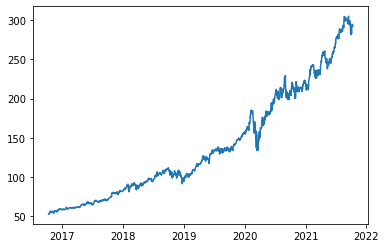

In [7]:
import matplotlib.pyplot as plt
plt.plot(df_x)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_x=scaler.fit_transform(np.array(df_x).reshape(-1,1))

In [17]:
##splitting dataset into train and test split
training_size=int(len(df_x)*0.65)
# test_size=len(df_x)-len(training_size)
train_data,test_data=df_x[0:training_size,:],df_x[training_size:len(df_x),:1]

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [10]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 117ms/step - loss: 0.0111 - val_loss: 0.1035
Epoch 2/100
12/12 [==============================] - 1s 66ms/step - loss: 0.0024 - val_loss: 0.0089
Epoch 3/100
12/12 [==============================] - 1s 63ms/step - loss: 5.1507e-04 - val_loss: 0.0079
Epoch 4/100
12/12 [==============================] - 1s 64ms/step - loss: 2.8816e-04 - val_loss: 0.0025
Epoch 5/100
12/12 [==============================] - 1s 64ms/step - loss: 1.8068e-04 - val_loss: 0.0012
Epoch 6/100
12/12 [==============================] - 1s 63ms/step - loss: 1.4986e-04 - val_loss: 0.0012
Epoch 7/100
12/12 [==============================] - 1s 62ms/step - loss: 1.2711e-04 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 1s 64ms/step - loss: 1.3149e-04 - val_loss: 0.0012
Epoch 9/100
12/12 [==============================] - 1s 63ms/step - loss: 1.1987e-04 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 1s 63ms/step - lo

Epoch 78/100
12/12 [==============================] - 1s 63ms/step - loss: 9.5310e-05 - val_loss: 9.4373e-04
Epoch 79/100
12/12 [==============================] - 1s 62ms/step - loss: 9.3954e-05 - val_loss: 8.3938e-04
Epoch 80/100
12/12 [==============================] - 1s 62ms/step - loss: 9.6114e-05 - val_loss: 6.7657e-04
Epoch 81/100
12/12 [==============================] - 1s 62ms/step - loss: 8.8134e-05 - val_loss: 7.9083e-04
Epoch 82/100
12/12 [==============================] - 1s 62ms/step - loss: 1.0205e-04 - val_loss: 8.8139e-04
Epoch 83/100
12/12 [==============================] - 1s 63ms/step - loss: 1.0598e-04 - val_loss: 6.8093e-04
Epoch 84/100
12/12 [==============================] - 1s 63ms/step - loss: 8.9960e-05 - val_loss: 7.0494e-04
Epoch 85/100
12/12 [==============================] - 1s 62ms/step - loss: 8.7533e-05 - val_loss: 8.1581e-04
Epoch 86/100
12/12 [==============================] - 1s 62ms/step - loss: 8.5776e-05 - val_loss: 9.9275e-04
Epoch 87/100
12/12 

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102.76624163133822

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

237.39348693373665

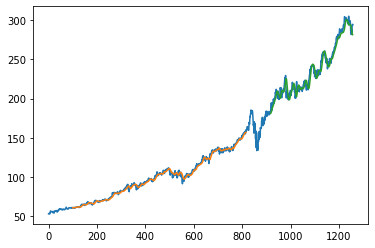

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_x)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_x)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_x)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_x))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
model.save_weights('./checkpoints/my_checkpoint')

In [12]:
model.load_weights('./checkpoints/my_checkpoint')
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


## Testing the model on Apple data

In [17]:
aapl = yf.Ticker("AAPL")

In [18]:
hist_a = aapl.history(period="1y")

In [30]:
df_x_a_1 = hist_a['Close']

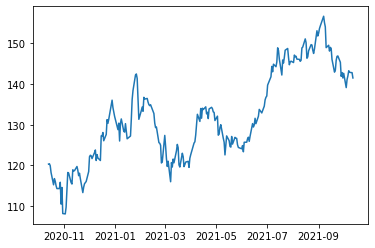

In [20]:
plt.plot(df_x_a)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_x_a=scaler.fit_transform(np.array(df_x_a).reshape(-1,1))

In [23]:
time_step = 100
x,y = create_dataset(df_x_a, time_step)

In [24]:
x =x.reshape(x.shape[0],x.shape[1] , 1)

In [25]:
x.shape

(151, 100, 1)

In [27]:
y_pred=model.predict(x)

In [28]:
y_pred=scaler.inverse_transform(y_pred)

In [36]:
len(df_x_a_1)

252

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y,y_pred))

135.65150700279224

In [38]:
df_x_a_1=np.array(df_x_a_1).reshape(-1,1)
df_x_a_1.shape

(252, 1)

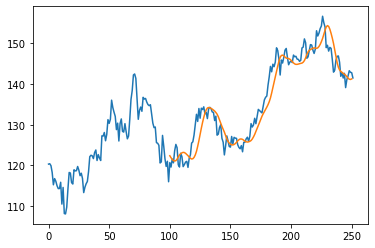

In [68]:
look_back=100
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_x_a_1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[look_back:len(y_pred)+look_back, :] = y_pred
# plot baseline and predictions
plt.plot(df_x_a_1)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_x)-1, :] = test_predict